In [5]:
import csv
import json

csvFilePath = "unemployment.csv"
jsonFilePath = 'unemployment_json.json'

with open(csvFilePath, 'r') as csvFile:
    csv_reader = csv.DictReader(csvFile, fieldnames = ("Area", "State", "Year", "Month", "Civilian Labor Force", 
                                                        "Employment","Unemployment", "Unemployment Rate",
                                                        "State FIPS Code", "Area FIPS Code"))
    json_File = json.dumps([row for row in csv_reader], indent = 5)
    
with open(jsonFilePath, 'w') as jsonFile:
    jsonFile.write(json_File)
    
input_file = open(jsonFilePath, 'r')
json_unemp = json.load(input_file)
#print(json_unemp)

In [6]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017")
db = client['unemployment_database']
connection = db['unemployment_2016']
connection.insert(json_unemp)

C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5eaaabf73694316361d35c43'),
 ObjectId('5eaaabf73694316361d35c44'),
 ObjectId('5eaaabf73694316361d35c45'),
 ObjectId('5eaaabf73694316361d35c46'),
 ObjectId('5eaaabf73694316361d35c47'),
 ObjectId('5eaaabf73694316361d35c48'),
 ObjectId('5eaaabf73694316361d35c49'),
 ObjectId('5eaaabf73694316361d35c4a'),
 ObjectId('5eaaabf73694316361d35c4b'),
 ObjectId('5eaaabf73694316361d35c4c'),
 ObjectId('5eaaabf73694316361d35c4d'),
 ObjectId('5eaaabf73694316361d35c4e'),
 ObjectId('5eaaabf73694316361d35c4f'),
 ObjectId('5eaaabf73694316361d35c50'),
 ObjectId('5eaaabf73694316361d35c51'),
 ObjectId('5eaaabf73694316361d35c52'),
 ObjectId('5eaaabf73694316361d35c53'),
 ObjectId('5eaaabf73694316361d35c54'),
 ObjectId('5eaaabf73694316361d35c55'),
 ObjectId('5eaaabf73694316361d35c56'),
 ObjectId('5eaaabf73694316361d35c57'),
 ObjectId('5eaaabf73694316361d35c58'),
 ObjectId('5eaaabf73694316361d35c59'),
 ObjectId('5eaaabf73694316361d35c5a'),
 ObjectId('5eaaabf73694316361d35c5b'),
 ObjectId('5eaaabf7369431

In [7]:
import pandas as pd
import numpy as np

#Converting data from MongoDB to CSV and then Pandas Data Frame for cleaning and processing 
df = pd.DataFrame(list(connection.find()))
df.to_csv("unemployment_modified.csv", index = None)

#Checking for missing, NA values. Found none. 
miss = ['NA', 'na', 'N/A', 'n/a', '?', '']
dataFile = pd.read_csv("unemployment_modified.csv")
missingVal = dataFile.columns[dataFile.isnull().any()].tolist()
print(missingVal)

#Removed repeated header and _id column 
dataFile = dataFile.iloc[1:]
dataFile = dataFile.drop('_id', axis = 1)

#Converting all the numerical columns to float to maintain consistency and to avoid problems with Linear Regression Model
#And removing ',' seperator in these columns 
dataFile['Civilian Labor Force'] = dataFile['Civilian Labor Force'].str.replace(",","").astype(float)
dataFile['Employment'] = dataFile['Employment'].str.replace(",","").astype(float)
dataFile['Unemployment'] = dataFile['Unemployment'].str.replace(",","").astype(float)
dataFile['Unemployment Rate'] = dataFile['Unemployment Rate'].astype(float)
dataFile['Area FIPS Code'] = dataFile['Area FIPS Code'].astype(str)


dataFile.head()

[]


,Area,State,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,State FIPS Code,Area FIPS Code
1,Anniston-Oxford-Jacksonville,AL,2016,01,45975.0,42825.0,3150.0,6.9,01,11500
2,Auburn-Opelika,AL,2016,01,71907.0,68300.0,3607.0,5.0,01,12220
3,Birmingham-Hoover,AL,2016,01,530712.0,501440.0,29272.0,5.5,01,13820
4,Daphne-Fairhope-Foley,AL,2016,01,87970.0,83312.0,4658.0,5.3,01,19300
5,Decatur,AL,2016,01,68312.0,64293.0,4019.0,5.9,01,19460


In [5]:
#Filtering data on basis of state
#AL = (dataFile['State'] == 'AL')
#dataFile[AL]

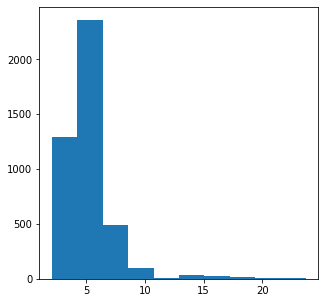

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5,5]
plt.hist(dataFile['Unemployment Rate'])
plt.show()

Text(0, 0.5, 'State')

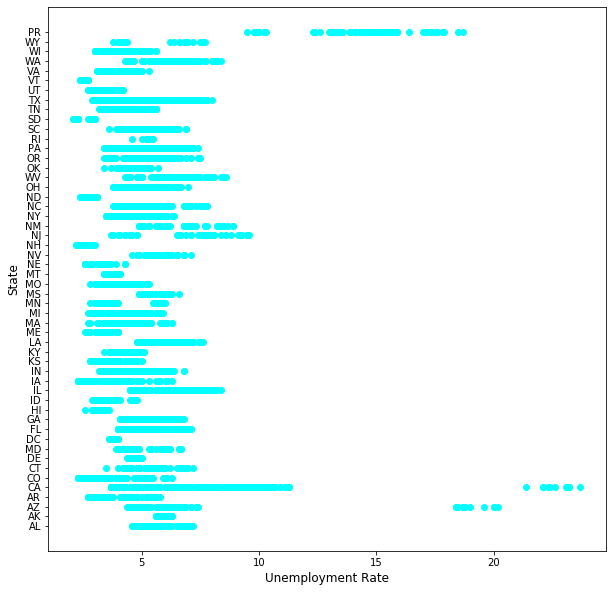

In [23]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter('Unemployment Rate', 'State', data = dataFile, c='cyan')
plt.xlabel('Unemployment Rate', fontsize='large')
plt.ylabel('State', fontsize='large')

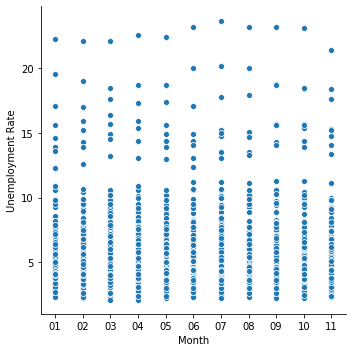

In [10]:
sns.relplot(x="Month", y="Unemployment Rate", data = dataFile)


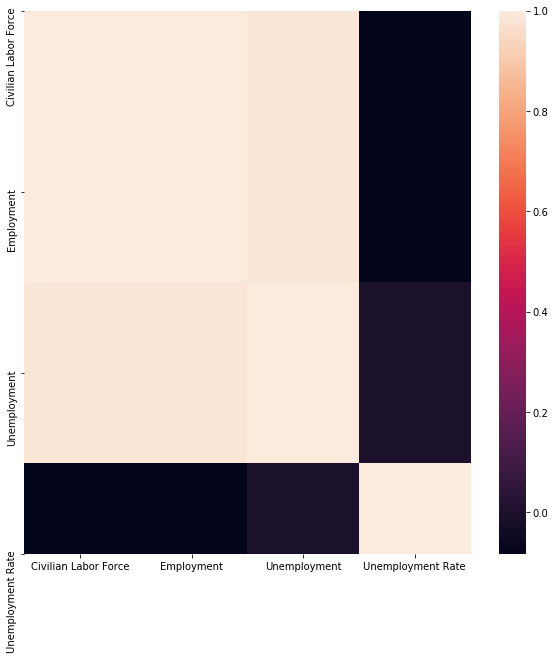

In [11]:
sns.heatmap(dataFile.corr())

In [12]:
#Start of Linear Regression 

#Considering independent and dependent columns from the data 
X = dataFile['Civilian Labor Force'].values
y = dataFile['Unemployment Rate'].values

#Reshaping the arrays as it contains only 1 row
X= X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [13]:
#Splitting the data into test and train at 80-20 ratio 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
#Fitting Linear Regression model on the train data 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Predicting on test data using Linear Regression Model

y_pred = regressor.predict(X_test)
print(y_pred)

[[5.34406728]
 [5.03619343]
 [5.29867233]
 [5.34079185]
 [5.33064525]
 [5.33934632]
 [5.2547211 ]
 [5.33982595]
 [5.34578547]
 [5.33513433]
 [5.33723249]
 [5.32262153]
 [5.3292379 ]
 [5.30137329]
 [5.32412874]
 [5.33408545]
 [5.34179451]
 [5.30754239]
 [5.28368783]
 [5.30971851]
 [5.31370927]
 [5.26859342]
 [5.34185037]
 [5.2917654 ]
 [5.32548766]
 [5.34107838]
 [5.28650494]
 [5.33092837]
 [5.31997542]
 [5.28771959]
 [5.34183711]
 [5.27490377]
 [5.32670331]
 [5.33971644]
 [5.28399205]
 [5.33109153]
 [5.33434205]
 [5.33527519]
 [5.33869429]
 [5.34603865]
 [5.12530714]
 [5.2586341 ]
 [5.32879786]
 [5.28662369]
 [5.21750298]
 [5.32957186]
 [5.32012391]
 [5.33732653]
 [5.33746758]
 [5.32299788]
 [5.33828438]
 [5.33876904]
 [5.33837078]
 [5.34585319]
 [5.32581317]
 [4.74066822]
 [5.337859  ]
 [5.32546656]
 [5.29865847]
 [5.34034858]
 [5.33917151]
 [5.3330639 ]
 [5.3332144 ]
 [5.3011808 ]
 [5.32340196]
 [5.33358291]
 [5.34004095]
 [5.32855432]
 [5.32653975]
 [5.31399018]
 [5.3092218 ]
 [5.32

In [16]:
#Calculating R2 Square

from sklearn.metrics import r2_score
lm_score = r2_score(y_test, y_pred)
print(lm_score)

0.0036083315457919873


In [17]:
#Random Forest Regressor 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as rfr
random_regressor = rfr(n_estimators = 500, random_state = 0)
random_regressor.fit(X_train, y_train)
y_pred_rfr = random_regressor.predict(X_test)
print(y_pred_rfr)

C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[ 3.9202      4.6226      3.137       5.2886      5.6708      8.6516
  3.472       5.21        5.98182     4.012       3.9806      3.996
  4.2666      6.4266      4.3308      5.2078      8.3526      4.5326
  7.4916      5.5628      6.3636      5.138       5.6594      4.2994
  4.5386      5.5204      5.1762      5.5368      4.5768      4.2804
  6.3716      4.2178      7.8748      6.395       7.6594      5.0048
  4.6452      6.159       4.668       6.6082      4.268       4.9744
  5.2678      4.8296      4.0918      5.1456      4.1938      3.34784
  3.7726      5.2878      6.6116      5.9464      6.828      12.6218
  5.7666      4.9948      4.0536      5.2822      3.137       3.2584
  4.24448667  4.3602      4.0438      6.2844      5.2394      5.6344
  3.7524      5.2988      3.2472      6.8916      5.3472      5.5618
  4.492       4.2604      6.0022      4.6036      4.0028      4.4924
  5.30643238  4.3836      5.3178      4.6322      4.0282     10.9516
  3.4812      6.3826      4.8122  

In [18]:
#Accuracy for Random Forest Regressor 

errors = abs(y_pred_rfr - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2),'%.')

Average absolute error: 1.76 degrees.
Accuracy: 64.95 %.


In [19]:
#Accuracy metrics for Random Forest Regressor 

from sklearn import metrics

MSE = metrics.mean_squared_error(y_test, y_pred_rfr)
MAE = metrics.mean_absolute_error(y_test, y_pred_rfr)
RMSE = np.sqrt(MSE)
print('MSE:', MSE)
print('MAE:', MAE)
print('RMSE:', RMSE)

MSE: 4.7206374696468965
MAE: 1.2383800003661602
RMSE: 2.1727028028809867


In [ ]:
x_grid = np.arange(min(X), max(X), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(x_grid, random_regressor.predict(x_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Civilian Labor Force')
plt.ylabel('Unemployment Rate')
plt.show()